# From 2018-12-26 to 2020-07-30

In [1]:
def wordcloud():
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import re
    import nltk
    from nltk.tokenize import word_tokenize
    from nltk.stem import WordNetLemmatizer
    from nltk.corpus import stopwords
    from nltk import FreqDist
    import string
    from wordcloud import WordCloud
    data = pd.read_excel('DataNLP.xlsx',usecols=[0,1,2])
    data = data.fillna(' ')
    data['Article'] = data['Title'] + ' ' + data['Summary']
    data.drop_duplicates(subset='Article',inplace=True)
    df = data.copy()
    df = df[['Article','Published On']]
    df['Published On'] = pd.to_datetime(df['Published On'],format='%Y-%m-%d').dt.date
    df['Published On'] = pd.to_datetime(df['Published On'])
    get_date = input('Enter the Date:')
    date = df.loc[df['Published On'] == get_date,['Article']]
    date.drop_duplicates(subset='Article',inplace= True)
    text = ' '.join(data['Article']).lower().strip()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ''.join([char for char in text if not char.isdigit()])
    text = word_tokenize(text)
    stp = ['u','us']
    stop_eng = stopwords.words('english')
    stops = stop_eng + stp
    text = [word for word in text if word not in stops]
    word_lem = WordNetLemmatizer()
    news_text = [word_lem.lemmatize(word,pos='v') for word in text]
    cloud_news = ' '.join(title for title in news_text)
    word_cloud = WordCloud(collocations = False,background_color='white').generate(cloud_news)
    plt.figure(figsize=(10,10))
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()
    frequency = FreqDist(news_text)
    plt.title("The US Stock Market")
    freq = frequency.plot(20,cumulative=False)
    return word_cloud,freq

Enter the Date:2019-01-01


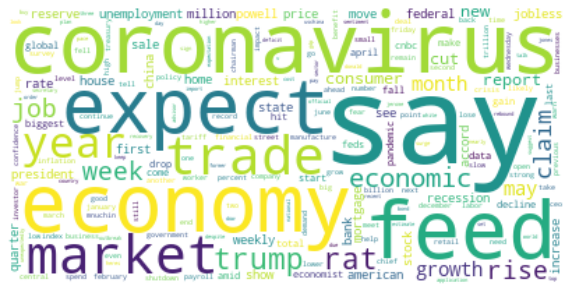

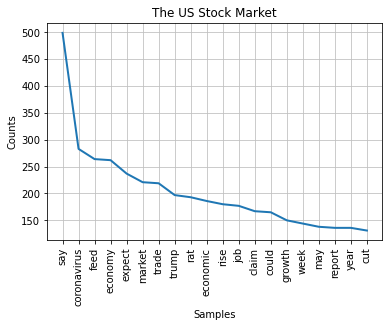

(<wordcloud.wordcloud.WordCloud at 0x1b6b75b4b20>,
 <AxesSubplot:title={'center':'The US Stock Market'}, xlabel='Samples', ylabel='Counts'>)

In [2]:
wordcloud()